
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2024**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy.stats

seaborn.set_context("talk", font_scale=1)

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
pd.options.display.max_columns=None
df = pd.read_csv(url)

In [3]:
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",¿Salir o seguir contestando?,profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,Uno,26.0,Abril,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,1.0,1.0,0,"Amazon Web Services, Linux","Bash/Shell, Python",Angular,Ninguna de las anteriores,Ninguna de las anteriores,De 201 a 500 personas,100% remoto,0,5,0,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,Dos,24.0,Mayo,2,Ninguna de las anteriores,3,DevOps Engineer,23.0,2.0,2.0,4,"Docker, Kubernetes, Linux, VMWare, Windows Server","Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...","Angular, Bootstrap, jQuery, Laravel, Node.js","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","PHPUnit, Postman",De 201 a 500 personas,100% presencial,0,4,1,Responder sobre mis estudios,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,No,0.0,No tuve,3,"Abono de Internet, Capacitaciones y/o cursos,",3,Developer,0.0,0.0,0.0,0,Ninguna de las anteriores,"SQL, Oracle APEX, PL-SQL, SQL Developer",Ninguno de los anteriores,Oracle,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,10,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,Dos,11.0,Mayo,1,"Capacitaciones y/o cursos, Descuento en gimnas...",2,Business Analyst,2.0,2.0,0.0,0,"Azure, SAP, CRM",ABAP,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",Ninguna de las anteriores,De 501 a 1000 personas,Híbrido (presencial y remoto),1,7,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,Dos,60.0,Mayo,1,Ninguna de las anteriores,1,QA / Tester,3.0,0.0,0.0,1,"Docker, Linux",Java,Lippia,Ninguna de las anteriores,"Appium, Cucumber, Lippia, Selenium",De 51 a 100 personas,100% remoto,0,7,2,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [4]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

**Dada que las respuestas en la columna genero son muy diversas, a las mismas las vamos a analizar una x una y las vamos a categorizar de la siguiente forma:**
1. H -> Se corresponde a Hombre
2. M -> Se corresponde a Mujer
3. NB -> Se corresponde al genero No Binario


In [5]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis':'H', 'Mujer Cis': 'M', 'Hombre': 'H', 'Prefiero no decir': 'NB', 'normal':'H',
       'Varon':'H', 'Agénero':'NB', 'Masculino':'H', 'Dolarsexual':'H', '.':'NB', 'Queer':'NB',
       'Mujer Trans': 'NB', 'No binarie': 'NB',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?': 'H',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.': 'H',
       'Hombre..... tipo normal': 'H', 'Cis': 'H', 'varon, no se que es varon cis': 'H',
       'Dejen de preguntar boludeces': 'H', 'Normal': 'H', 'que pelotudos eh': 'H',
       'hombre': 'H', 'Helicoptero de ataque apache': 'H', 'Varón Trans': 'NB',
       'Varoo natural': 'H', 'Varón': 'H', 'Bigénero': 'NB', 'Mujer': 'M', 'Transformer': 'NB',
       'Fluido': 'H', 'masculino': 'H', 'Hombre, macho silencioso': 'H', 'varón': 'H',
       'no compliquemos lo simple': 'H', 'Agenero, presentación mujer cis': 'NB',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero': 'NB',
       'Macho': 'H', 'Porque tantas opciones? Solo hay 2. Soy hombre.': 'H',
       'heterosexual': 'H', 'Machote': 'H', 'Puto': 'NB', 'Gris': 'NB', 'Heterosexual': 'H',
       'Hombre    (sexo cromosómico:  XY)': 'H',
       'yo que se que es todo eso masculino': 'H',
       'Insisto, no es tan complicado. ': 'H',
       'No corresponde, es como preguntar la religion o el color de piel': 'M',
       'No entiendo': 'M', 'no entiendo ni mierda q es cada una': 'H',
       'Que? Fluido obvio': 'H', 'Lesbiana': 'M', 'Reptiliano': 'NB',
       'Que trolo sos para poner esas opciones': 'H', 'Hombre heterosexual': 'H',
       'HETERO': 'H', 'mujer':'M', 'Varon heterosexual':'H', 'Hombre normal': 'H',
       'mujer de cuando solo existian hombres y mujeres :oP': 'M',
       'Varón Cis, pero considero ofensivo el término y esta pregunta.': 'H',
       'no entiendo esas clasificaciones': 'M', 'HOMBRE': 'H', 'Varón común': 'H',
       'soy un pollo': 'NB', 'Hombre Heterosexual': 'H',
       'me identifico con el eter de alfa centauri en venus con papas': 'NB',
       'Hombre Hetero': 'H', 'iddqd': 'NB', 'Perro': 'NB',
       'heterosexual, pedazos de transtornados... ': 'H', 'Hombre Normal': 'H',
       'varon': 'H', 'Tantas opciones que no supe qué elegir': 'M',
       'Hombre. Varon.': 'H', 'Helicóptero': 'H', 'hetero': 'H',
       'Sin enfermedades psiquiatricas': 'H', 'helicoptero apache': 'H',
       'Hombre. Nada de pelotudeces.': 'H', 'soy mujer': 'M', 'que pelotudez': 'M',
       'Soy hombre, el resto no se que significa': 'H',
       'Soy una paleta de Carne': 'NB',
       'Que ganas de joder. Hombre heterosexual.': 'H', 'Usen castellano...': 'M',
       'Masculino, Hombre, no encontré la opción correcta': 'H',
       'que dificil esta pregunta': 'H',
       'Es hombre o mujer, no caigan en esta pavada': 'H',
       'No deberia ser obligatorio esto': 'M', 'Dolphin': 'NB', 'marika': 'NB',
       'Hombre con pene': 'H',
       'Varon macho pecho peludo, dejen de agregar tantas opciones lgbtq+qweasdw3': 'H',
       'Esto es una boludes de pregunta. (En la universidad tambien la hacen)': 'H',
       'MASCULINO': 'H', 'hombre varon': 'H',
       'HOMBRE. nada de varon cis ni esas pelotudeces': 'H', 'Varon no Cis': 'NB',
       'un muchacho simple': 'H',
       'Me molestan estas estupideces soy Mujer de nacimiento.': 'M',
       'Hombre, no tengo ni idea que quiere decir cad aúna de las anteriores opciones ': 'H',
       'Si caigo al hospital con perdida de conocimiento, me van a tratar como lo que soy... Hombre': 'H',
       'hombre de hombre porque soy hombre': 'H', 'en serio?': 'H',
       'Hombre de verdad': 'H', 'Que carajo son todas esos géneros. Hombre.': 'H',
       'Soy hombre': 'H',
       'Varon (tiene que estar como opción, no dar por asumido nada)': 'H',
       'Esto es una boludez': 'M', 'Mujer (nada de cis)': 'M', 'No se q elegir': 'NB',
       'macho machista respetuoso de todes les demas': 'H', 'cis': 'NB', 'Hétero': 'H',
       'Hombre a secas': 'H', 'Varón hetero': 'H', 'Tractor multi punto': 'H',
       'que pelotudes...': 'M', 'varon bi': 'NB', 'Que boludez es esto': 'M',
       'Pregunto, ¿Qué tiene que ver esto con la temática de la encuesta?': 'H',
       'no se que poner': 'NB',
       'me identifico con todos, con el ser humano, soy heterosexual': 'H',
       'hombre clasico': 'H', 'arstotzko': 'NB', 'varon normal': 'H', 'Camionero': 'H',
       'Hombre)?': 'H', 'Otaku': 'NB', 'Humano': 'NB', 'Soy Hombre.': 'H', 'Normal :)': 'H',
       'Hombre Varón': 'H', 'Es broma verdad?': 'M', 'no es relevante': 'M',
       'Varon sin utero': 'H', 'Basta': 'M', 'Hetero': 'H', 'Hiperpiturro': 'H',
       'Varon, sin mas': 'H', 'Pokemón': 'NB', 'Pelutudeces NO': 'M',
       'Mujer NB (consejo, quizá podrían hacer un refactor de esta pregunta permitiendo muchas respuestas, así elegiría mujer, NB y trans, mientras que un hombre cis elegiría hombre y cis, sé que no todos en la comunidad IT se toman esto seriamente pero es más correcto y fiel a las experiencias de las personas)': 'NB',
       'Varón Cis No binario': 'NB'}).fillna(False)

In [6]:
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",¿Salir o seguir contestando?,profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender,profile_g
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,Uno,26.0,Abril,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,1.0,1.0,0,"Amazon Web Services, Linux","Bash/Shell, Python",Angular,Ninguna de las anteriores,Ninguna de las anteriores,De 201 a 500 personas,100% remoto,0,5,0,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis,H
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,Dos,24.0,Mayo,2,Ninguna de las anteriores,3,DevOps Engineer,23.0,2.0,2.0,4,"Docker, Kubernetes, Linux, VMWare, Windows Server","Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...","Angular, Bootstrap, jQuery, Laravel, Node.js","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","PHPUnit, Postman",De 201 a 500 personas,100% presencial,0,4,1,Responder sobre mis estudios,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis,H
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,No,0.0,No tuve,3,"Abono de Internet, Capacitaciones y/o cursos,",3,Developer,0.0,0.0,0.0,0,Ninguna de las anteriores,"SQL, Oracle APEX, PL-SQL, SQL Developer",Ninguno de los anteriores,Oracle,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,10,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis,M
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,Dos,11.0,Mayo,1,"Capacitaciones y/o cursos, Descuento en gimnas...",2,Business Analyst,2.0,2.0,0.0,0,"Azure, SAP, CRM",ABAP,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",Ninguna de las anteriores,De 501 a 1000 personas,Híbrido (presencial y remoto),1,7,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis,M
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,Dos,60.0,Mayo,1,Ninguna de las anteriores,1,QA / Tester,3.0,0.0,0.0,1,"Docker, Linux",Java,Lippia,Ninguna de las anteriores,"Appium, Cucumber, Lippia, Selenium",De 51 a 100 personas,100% remoto,0,7,2,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis,H


In [7]:
lenguajes = 'tools_programming_languages'
neto = 'salary_monthly_NETO'
bruto = 'salary_monthly_BRUTO'
contrato = 'work_contract_type'
modalidad = 'work_work_modality'
dolares = 'salary_in_usd'
genero = 'profile_g'

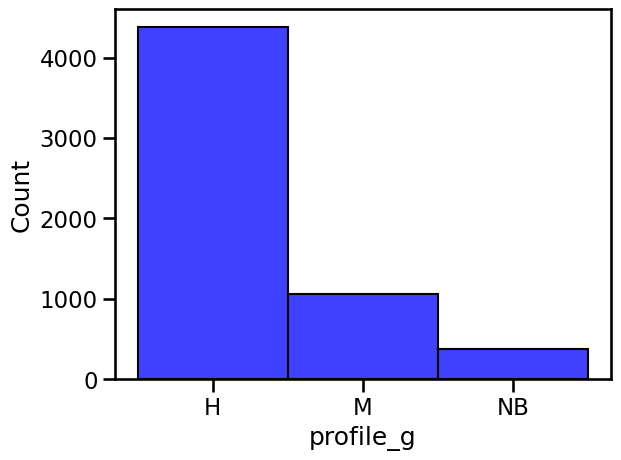

In [8]:
seaborn.histplot(df[genero], bins=10, color='blue', log_scale=True);

In [9]:
df[genero].unique()

array(['H', 'M', 'NB'], dtype=object)

In [23]:
df[[genero, neto]].groupby(genero).describe()

salary_monthly_NETO                                                \
                        count           mean           std    min       25%   
profile_g                                                                     
H                      4207.0  603188.854935  1.020898e+06    1.0  269340.0   
M                      1012.0  406553.960553  4.235321e+05    1.0  199750.0   
NB                      347.0  598955.743942  1.222756e+06  145.0  239020.0   

                                           
                50%       75%         max  
profile_g                                  
H          420000.0  625000.0  45000000.0  
M          334000.0  470750.0   6000000.0  
NB         400000.0  600000.0  20000000.0

In [11]:
alpha = 0.05

In [25]:
is_man = df.profile_g == 'H'
is_woman = df.profile_g == 'M'
is_nobinary = df.profile_g == 'NB'


In [26]:
groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & (is_woman | is_nobinary)].salary_monthly_NETO


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

## Respuesta Ejercicio 1: Estimación

**Para comenzar a resolver este punto tenemos 2 grupos, donde en cada grupo se detallan:**
1. GrupoA: Salarios Netos de Hombres
2. GrupoB: Salarios Netos de Mujeres y No Binarios

In [27]:
print(f'Muestras del grupo A: {len(groupA)}')
print(f'Muestras del grupo B: {len(groupB)}')

Muestras del grupo A: 4006
Muestras del grupo B: 1249


**Calculamos el estimador puntual**

In [28]:
estimador = groupA.mean() - groupB.mean()
print(f'Estimador Puntual = {round(estimador, 1)}')

Estimador Puntual = 137661.8


**Para el calculo del Intervalo de confianza**

### METODO A

**Un poco de teoría**

Las variables aleatorias *Salario NETO de hombres* ($X_{a}$) y *Salario NETO de otros* ($X_{b}$) poseen una distribución que desconocemos.

Tenemos una **muestra aleatoria** para cada una de estas variables.
Por el **TCL** sabemos que vale lo siguiente:

- Para el **promedio** de salarios de hombres.

    $\overline{X_{a}} \sim N(\mu_{a}, \frac{\sigma^{2}_{a}}{n_{a}})$

- Para el **promedio** de salarios de otros.

    $\overline{X_{b}} \sim N(\mu_{b}, \frac{\sigma^{2}_{b}}{n_{b}})$

Por lo tanto, asumiendo la *independencia* entre ambas variables, tenemos la distribución de nuestro **estimador**.

- $\overline{X_{a}} - \overline{X_{b}} \sim N(\mu_{a} - \mu_{b}, \frac{\sigma^{2}_{a}}{n_{a}} + \frac{\sigma^{2}_{b}}{n_{b}})$

**Calculamos los parámetros para las distribuciones de las VA.**

In [29]:
n_a = len(groupA)
n_b = len(groupB)
mu_a = groupA.mean()
mu_b = groupB.mean()
sigma2_a = groupA.var()
sigma2_b = groupB.var()

In [54]:
mu = mu_a - mu_b
print(f'Esperanza del Estimador = {round(mu, 1)}')

sigma2 = (sigma2_a / n_a) + (sigma2_b / n_b)
print(f'Varianza del Estimador = {round(sigma2, 1)}')

sigma = numpy.sqrt(sigma2)
print(f'Desviación del Estimador = {round(sigma, 1)}')

print('----------')



Esperanza del Estimador = 137661.8
Varianza del Estimador = 706931085.7
Desviación del Estimador = 26588.2
----------


**Vamos a utilizar la libreria Scipy, donde El intervalo de confianza para una distribución normal se puede calcular utilizando la función scipy.stats.norm.interval. Aquí está cómo se utiliza:**

Definición de parámetros:
1. alpha: El nivel de confianza deseado (por ejemplo, 0.95 para un intervalo de confianza del 95%).
2. loc: La media de la distribución normal.
3. scale: La desviación estándar de la distribución normal.

In [61]:
intervalo = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)
print(f'Intervalo de Confianza ({ 1 - alpha}) = {intervalo}')

i, s = intervalo
print(f'Longitud del IC = {round(s - i, 1)})')


Intervalo de Confianza (0.95) = (85549.92919738541, 189773.66266882294)
Longitud del IC = 104223.7)


### METODO B

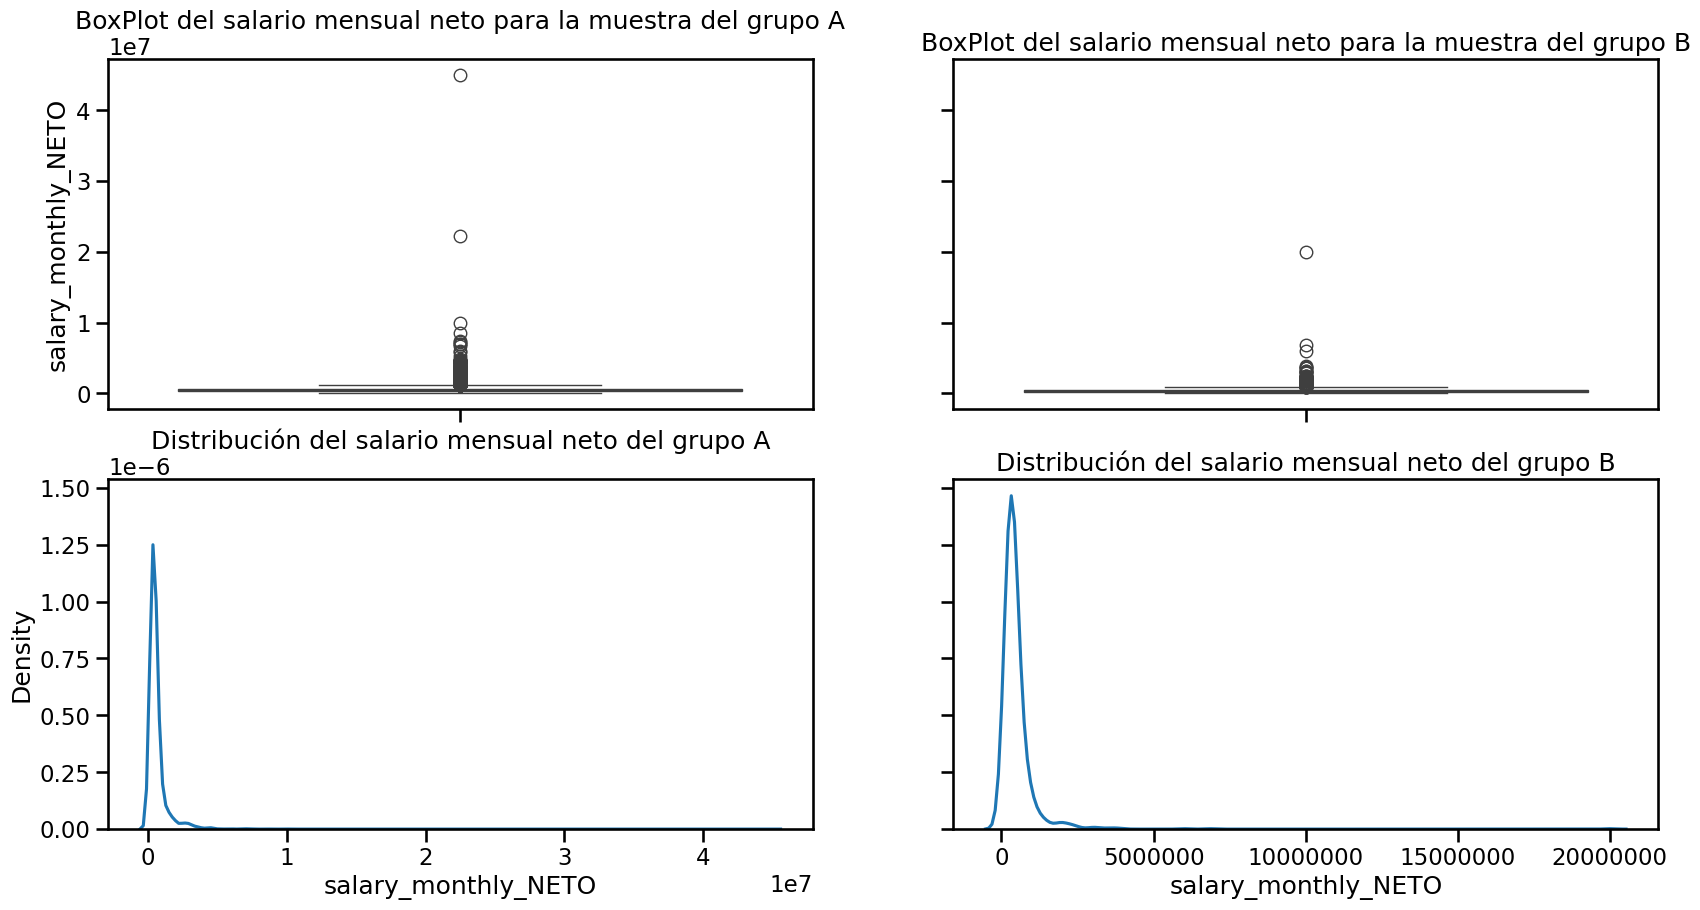

In [31]:
#Antes de construir el intervalo tenemos que saber si podemos considerar varianzas iguales o distintas. Lo veamos por medio de gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey='row')
seaborn.boxplot(groupA, ax=ax[0,0]).set(title='BoxPlot del salario mensual neto para la muestra del grupo A')
seaborn.boxplot(groupB, ax=ax[0,1]).set(title='BoxPlot del salario mensual neto para la muestra del grupo B')

seaborn.kdeplot(data=groupA, ax=ax[1,0]).set(title='Distribución del salario mensual neto del grupo A')
seaborn.kdeplot(data=groupB, ax=ax[1,1]).set(title='Distribución del salario mensual neto del grupo B')

plt.ticklabel_format(style='plain', axis='x') 

plt.show()

In [32]:
# Levene test
# ==============================================================================
levene_test = scipy.stats.levene(groupA, groupB, center='mean')
print(f'P-valor = {levene_test[1]}')

P-valor = 7.045041130062932e-05


A continuación analizamos si los datos de las muestras provienen de una distribución normal para determinar si el intervalos será asintótico o no.
Los graficos qqplot nos sirve para intuir si las muestras van a tener distribucion normal (se comparan los quantiles teoricos de una N(0,1) con los muestrales).

Los puntos azules (cuantiles muestrales) deberían caer en la linea roja (cuantiles teóricos para esos valores de la muestra), o estar muy cercanos a ella.
 
**Por lo que podemos apreciar, las muestras no provienen de una distribución normal.**

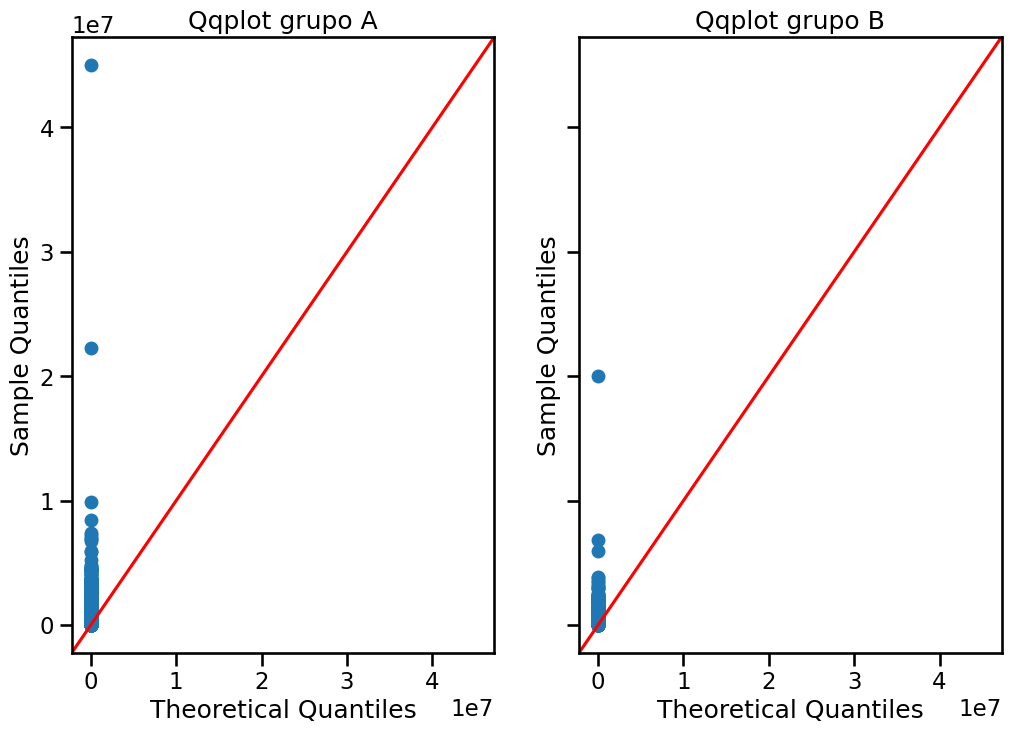

In [46]:
from statsmodels.graphics.gofplots import qqplot
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey='row')

qqplot(groupA , line='45', ax=ax[0])
ax[0].set_title('Qqplot grupo A') 
qqplot(groupB , line='45', ax=ax[1] )
ax[1].set_title('Qqplot grupo B') 


plt.show()

A partir de los graficos, ahora vamos a realizar la prueba de **Shapiro-Wilk**

In [47]:
from scipy.stats import norm, kstest
def probability_is_normal(data):
  """
  https://stackoverflow.com/questions/46678239/p-value-is-0-when-i-use-scipy-stats-kstest-for-large-dataset
  """
  loc, scale = norm.fit(data)
  # create a normal distribution with loc and scale
  n = norm(loc=loc, scale=scale)
  return kstest(data, n.cdf)[1]  #pvalue on second position

print(f'P-valor para groupA: {probability_is_normal(groupA)}')
print(f'P-valor para groupB: {probability_is_normal(groupB)}')

P-valor para groupA: 1.2522944418346493e-292
P-valor para groupB: 4.412847335677629e-81


El test de Shapiro-Wilk muestra que efectivamente las distribuciones de ambas muestras no son normales, ya que el $p$-valor es prácticamente cero. Es decir, la probabilidad de que las muestras provengan de poblaciones con distribución normal se puede considerar nula.

Las hipótesis que manejamos aquí son:

$H_0:$ La muestra groupA (groupB) proviene de una población con distribución normal.

$H_1:$ La muestra groupA (groupB) no proviene de una población con distribución normal.

**Decisión**: como $p$-valor $<<< \alpha=0.05$, se rechaza $H_0$ (esta decisión es compartida para ambos grupos).

**Conclusión**: Hay evidencia estadísticamente significativa para decir que la muestra groupA (groupB) no proviene de una distribución normal.

----------------------

**Construcción del intervalo de confianza:** enfoque teórico en base a los resultados de los test.

**Tomando como referencia el libro de David Moore, Estadística Aplicada Básica, segunda edición.**

Dada las dos muestras A y B con tamaños muestrales $n_A$ y $n_B$, respectivamente. Si sus varianzas $s_{A}^{2}$ y $s_{B}^{2}$ son distintas, vamos a utilizar como pivote para la construcción del intervalo de contianza del 95%, el estadístico de la prueba $t$ de Welch. Este pivote se construye con la siguiente fórmula:

$$
t=\frac{(\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B})}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}}
$$

y tiene una distribución $t$ de Student con $f$ grados de libertad dados por la ecuación de Welch-Sattertwaite, la cual se expresa como:

$$
\text { f }=\frac{\left(s_{A}^{2} / n_{A}+s_{B}^{2} / n_{B}\right)^{2}}{\left(s_{A}^{2} / n_{A}\right)^{2} /\left(n_{A}-1\right)+\left(s_{B}^{2} / n_{B}\right)^{2} /\left(n_{B}-1\right)}
$$



Moore* también propone obtener los grados de libertad $f$ con la siguiente expresión:

$$f=min\{n_A , n_B \}-1$$

sobre todo cuando no contamos con una computadora, la fórmula anterior nos brinda una herramienta sencilla para hacer los cálculos a mano.


Entonces, el intervalo de confianza quedará construido de la siguiente manera**:

Para $\alpha = 0.05$:
$$P\left(\hat{\theta}_{1} \leq \theta \leq \hat{\theta}_{2}\right)=1-\alpha$$

Donde $ \theta = \mu_A - \mu_B$ y,  $\hat{\theta}_{1}, \hat{\theta}_{2}$ son los extremos del intervalo a calcular utilizando la información de que el pivote sigue una distribución $t$ de Student con $f$ grados de libertad.

$$
P\left(-t_f \leq \frac{(\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B})}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}} \leq t_f\right)=0.95
$$


$$
P\left(-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}} \leq (\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B}) \leq t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}\right)=0.95
$$

$$
P\left((\bar{X_A}-\bar{X_B})-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}} \leq (\mu_{A}-\mu_{B}) \leq (\bar{X_A}-\bar{X_B})+t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}\right)=0.95
$$


Así:

$\hat{\theta}_{1}= (\bar{X_A}-\bar{X_B})-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}$

y

$\hat{\theta}_{2}= (\bar{X_A}-\bar{X_B})+t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}$


Nota: $t_f$ es el percentil correspondiente a una probabilidad acumulada de $97.5\%$ de una distribución $t$ de Student con $f$ grados de libertad. Por simplicidad en la notación usamos $t_{f,0.975}=t_f$.


(**) Supondremos un intervalo de confianza asintótico, pues las muestras no provienen de distribuciones normales.

In [49]:
meanA = groupA.mean()
meanB = groupB.mean()
stdA = groupA.std()
stdB = groupB.std()

estimador_puntual = round(meanA - meanB, 2)
sample_std = round(stdA - stdB, 2)

N_A = groupA.count()
N_B = groupB.count()

Grados de libertad propuesto por Welch

In [50]:
N=((stdA**2/N_A)+ (stdB**2/N_B))**2 
D=(stdA**2/N_A)**2 / (N_A-1) + (stdB**2/N_B)**2 / (N_B-1)
f_W=round(N/D) 
#---------------------------------------------------------------
#Grados de libertad usando el mínimo entre N_A y N_B
f_M=numpy.min([N_A, N_B])-1 


percentil 97.5% de una t de student con f_M grados de libertad

In [51]:
t = scipy.stats.t(f_M)
confianza=0.95
t_f = numpy.abs(t.ppf((1-confianza)/2)) #saca el percentil para alpha=0.05/2 de una t de Student con f_M grados de libertad (esto es lo que sería nuestro z0975 si la distribución fuese N(0,1))
print('El percentil que corresponde a f_M=',f_M, 'grados de libertad y una probabilidad acumulada de', confianza*100+(alpha*100)/2,'%', 'es:', round(t_f,3))

El percentil que corresponde a f_M= 1248 grados de libertad y una probabilidad acumulada de 97.5 % es: 1.962


Construcción de intervalo de confianza asintótico para la diferencia de medias usando el pivote con f_M= 890 gdl

In [53]:
theta_cop_1= estimador_puntual - t_f * numpy.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite inferior del intervalo
theta_cop_2= estimador_puntual + t_f * numpy.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite superior del intervalo

print('Intervalo de Confianza= (', round(theta_cop_1,3), ',', round(theta_cop_2,3), ')')
print('La longitud del intervalo construido con', f_M, 'grados de libertad es ', round(theta_cop_2-theta_cop_1,3))

Intervalo de Confianza= ( 85499.345 , 189824.255 )
La longitud del intervalo construido con 1248 grados de libertad es  104324.911


**El valor del Intervalo de confianza es el mismo en los metodos de calculo A y B**

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [21]:
from statsmodels.stats.power import tt_ind_solve_power

In [22]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.8

In [23]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=power,  ratio=ratio)

163.1896108369031

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
